In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('labels2.csv')
df2 = pd.read_csv('recon2.csv')

In [3]:
df3 = pd.concat([df1,df2], axis=1, join="inner")

In [4]:
df3.drop('n_x', axis=1, inplace=True)
df3.drop('n_y', axis=1, inplace=True)
df3.drop('cotAlpha',axis = 1, inplace=True)
df3.drop('cotBeta',axis = 1, inplace=True)
df3.drop('number_eh_pairs', axis=1, inplace=True)
df3.drop('x-entry', axis=1, inplace=True)
df3.drop('y-entry', axis=1, inplace=True)

In [5]:
df3.head()
df3.to_csv('sampleSmallSet.csv',index=False)

In [6]:
getFrame = pd.read_csv('sampleSmallSet.csv')
getFrame1 = getFrame[getFrame['z-entry'] == 100]
getFrame2 = getFrame1[getFrame1['n_z'] < 0]
getFrame3 = getFrame2[getFrame2['pt'] > 3]

#choose 6,732 events from high pt only since want to get equal number of high low PT events
n = 6732
getFrame3=getFrame3.iloc[:n]
getFrame3.to_csv('positivePT.csv', index=False)

In [7]:
getFrame3

,z-entry,n_z,y-local,pt,0,1,2,3,4,5,...,263,264,265,266,267,268,269,270,271,272
2,100.0,-3.457585,-0.420641,3.45870,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,100.0,-3.470863,4.478230,3.47308,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,100.0,-3.888281,4.580780,3.91694,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,100.0,-3.295246,4.279990,3.33660,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,100.0,-4.251869,1.379520,4.25724,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77579,100.0,-4.296323,-6.769730,4.40451,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77580,100.0,-3.235039,-5.985180,3.30298,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77585,100.0,-3.750437,-6.104380,3.82187,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77587,100.0,-3.701789,-5.025670,3.74493,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
lowPT = pd.read_csv('sampleSmallSet.csv')
lowPT1 = lowPT[lowPT['z-entry'] == 100]
lowPT2 = lowPT1[lowPT1['n_z'] < 0]
lowPT3 = lowPT2[lowPT2['pt'] > 0]

In [11]:
lowPT3.to_csv('lowPT.csv', index=False)
lowPTdf = pd.read_csv('lowPT.csv')
lowPTdf = lowPTdf[lowPTdf['pt'] < 0.3]
lowPTdf

,z-entry,n_z,y-local,pt,0,1,2,3,4,5,...,263,264,265,266,267,268,269,270,271,272
20,100.0,-0.142119,-4.183470,0.147985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,100.0,-0.221941,-7.225820,0.232937,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,100.0,-0.177609,4.679670,0.177557,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,100.0,-0.257696,-0.320851,0.256929,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,100.0,-0.164437,7.279040,0.165515,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124390,100.0,-0.178173,-1.548270,0.181486,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124449,100.0,-0.190171,2.933710,0.189095,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124451,100.0,-0.250761,-1.491770,0.250964,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124455,100.0,-0.188104,-2.155020,0.188844,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
lowPTdf.to_csv('smallPT.csv', index=False)

In [13]:
concatenateSamples = pd.concat([lowPTdf, getFrame3])
concatenateSamples

,z-entry,n_z,y-local,pt,0,1,2,3,4,5,...,263,264,265,266,267,268,269,270,271,272
20,100.0,-0.142119,-4.183470,0.147985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,100.0,-0.221941,-7.225820,0.232937,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,100.0,-0.177609,4.679670,0.177557,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,100.0,-0.257696,-0.320851,0.256929,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,100.0,-0.164437,7.279040,0.165515,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77579,100.0,-4.296323,-6.769730,4.404510,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77580,100.0,-3.235039,-5.985180,3.302980,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77585,100.0,-3.750437,-6.104380,3.821870,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77587,100.0,-3.701789,-5.025670,3.744930,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
concatenateSamples = concatenateSamples.sample(frac=1).reset_index(drop=True)
concatenateSamples

,z-entry,n_z,y-local,pt,0,1,2,3,4,5,...,263,264,265,266,267,268,269,270,271,272
0,100.0,-0.189546,1.373240,0.190476,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,-3.928138,-4.944870,3.979020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,-3.241849,-7.841000,3.355870,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,-0.258914,0.978565,0.258655,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,-0.123128,-7.251630,0.132217,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,100.0,-0.226499,-4.636650,0.232003,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13460,100.0,-0.098091,1.955300,0.097416,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13461,100.0,-0.183542,7.074700,0.184372,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13462,100.0,-0.134243,0.127066,0.135407,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
concatenateSamples.to_csv('artificialSample.csv', index=False)

In [17]:
df5 = pd.read_csv('artificialSample.csv')

def myfunc(x):
    if x < 0.3: 
        return 0
    else:
        return 1
df5['pt'] = df5['pt'].apply(myfunc)

df5

,z-entry,n_z,y-local,pt,0,1,2,3,4,5,...,263,264,265,266,267,268,269,270,271,272
0,100.0,-0.189546,1.373240,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,-3.928138,-4.944870,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,-3.241849,-7.841000,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,-0.258914,0.978565,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,-0.123128,-7.251630,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,100.0,-0.226499,-4.636650,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13460,100.0,-0.098091,1.955300,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13461,100.0,-0.183542,7.074700,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13462,100.0,-0.134243,0.127066,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df5.drop('z-entry', axis=1, inplace=True)
df5.drop('n_z', axis=1, inplace=True)
df5

,y-local,pt,0,1,2,3,4,5,6,7,...,263,264,265,266,267,268,269,270,271,272
0,1.373240,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-4.944870,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-7.841000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.978565,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-7.251630,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,-4.636650,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13460,1.955300,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13461,7.074700,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13462,0.127066,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df5.to_csv('transformed1.csv',index=False)

In [20]:
df6 = pd.read_csv('transformed1.csv')

In [21]:
df6.drop('y-local', axis=1, inplace=True)
df6.drop('pt', axis=1, inplace=True)
df6

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def counterNonZeroRows(X):
    countRows = 0
    for i in X:
        checkOne = False
        for j in i:
            if (j >= 8000):
                checkOne = True
        if checkOne == True:
            countRows +=1
    #print(countRows)
    return countRows

In [23]:
list1 = []
for index, row in df6.iterrows():
    X = row.values
    X = np.reshape(X,(13,21))
    nonZeroRows = counterNonZeroRows(X)
    list1.append(nonZeroRows)

In [24]:
df_ySize = pd.DataFrame(list1)
df_ySize.columns = ['y-size']
df_ySize.to_csv('ysize1.csv',index=False)

In [25]:
#now concatenate both dataframes
dfA = pd.read_csv('ysize1.csv')
dfA

,y-size
0,4
1,4
2,4
3,3
4,7
...,...
13459,5
13460,5
13461,2
13462,6


In [26]:
dfB = pd.read_csv('transformed1.csv',usecols = ['y-local'])
dfB

,y-local
0,1.373240
1,-4.944870
2,-7.841000
3,0.978565
4,-7.251630
...,...
13459,-4.636650
13460,1.955300
13461,7.074700
13462,0.127066


In [27]:
readinPT = pd.read_csv('transformed1.csv', usecols=['pt'])
readinPT.to_csv('ptForAll.csv', index=False)

In [28]:
dfE = pd.concat([dfA,dfB,readinPT],axis=1)
dfE.to_csv('all.csv',index=False)

In [29]:
dfE

,y-size,y-local,pt
0,4,1.373240,0
1,4,-4.944870,1
2,4,-7.841000,1
3,3,0.978565,0
4,7,-7.251630,0
...,...,...,...
13459,5,-4.636650,0
13460,5,1.955300,0
13461,2,7.074700,0
13462,6,0.127066,0


In [30]:
dftrain = pd.read_csv('all.csv', usecols=['y-size', 'y-local'])
dftrain.to_csv('input.csv',index=False)

In [31]:
dftest = pd.read_csv('all.csv', usecols = ['pt'])
dftest.to_csv('labels.csv', index=False)

array([[<AxesSubplot:title={'center':'pt'}>]], dtype=object)

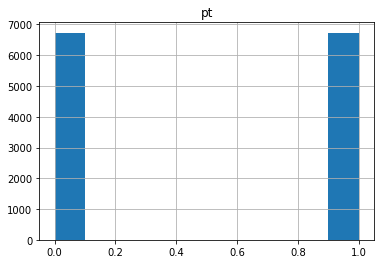

In [32]:
dftest.hist()